In [4]:
#2a .Logistik Regresi
import pandas as pd

# Memuat file CSV
file_path = '/content/police.csv'
data = pd.read_csv(file_path)

# Menampilkan data seperti pada gambar yang Anda berikan
print(data.head())



  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [ ]:

import pandas as pd

# Load data
df = pd.read_csv('/content/police.csv')

# Hitung proporsi pelanggaran berdasarkan jenis kelamin pengemudi
gender_proportion = df['driver_gender'].value_counts(normalize=True)

# Tampilkan hasil
print(gender_proportion)


driver_gender
M    0.72527
F    0.27473
Name: proportion, dtype: float64


In [ ]:

import pandas as pd

# Load dataset
df = pd.read_csv('/content/police.csv')

# Hitung proporsi pelanggaran berdasarkan jenis kelamin dan jenis pelanggaran
violation_by_gender = (
    df.groupby(['driver_gender', 'violation'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .to_frame(name='proportion')
)

# Tampilkan hasil
print(violation_by_gender)


                                                 proportion
driver_gender driver_gender violation                      
F             F             Equipment              0.105199
                            Moving violation       0.138218
                            Other                  0.029738
                            Registration/plates    0.044418
                            Seat belt              0.024312
                            Speeding               0.658114
M             M             Equipment              0.134158
                            Moving violation       0.206144
                            Other                  0.058985
                            Registration/plates    0.042175
                            Seat belt              0.036296
                            Speeding               0.522243


/tmp/ipython-input-5-2015440218.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['stop_time'] = pd.to_datetime(df['stop_time'], errors='coerce')


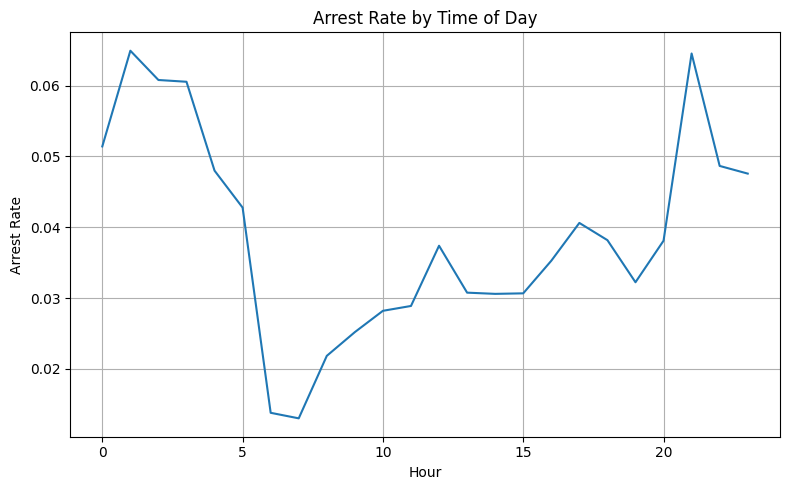

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/police.csv')

# Pastikan kolom 'stop_time' bertipe datetime
df['stop_time'] = pd.to_datetime(df['stop_time'], errors='coerce')

# Ambil jam dari stop_time
df['hour'] = df['stop_time'].dt.hour

# Hapus baris yang 'hour'-nya NaN
df = df.dropna(subset=['hour'])

# Hitung tingkat penangkapan per jam
arrest_rate = df.groupby('hour')['is_arrested'].mean()

# Plot
plt.figure(figsize=(8, 5))
arrest_rate.plot()
plt.title('Arrest Rate by Time of Day')
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.grid(True)
plt.tight_layout()
plt.show()


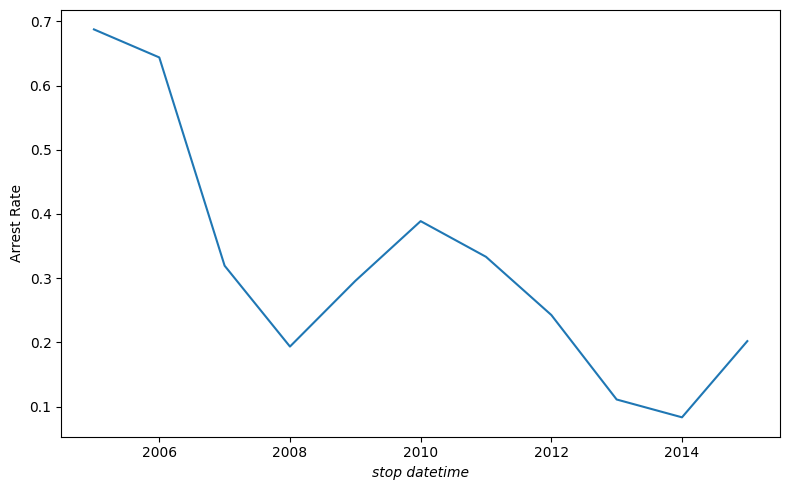

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/police.csv')

# Gabungkan kolom tanggal dan waktu jika perlu
if 'stop_date' in df.columns and 'stop_time' in df.columns:
    df['stop_datetime'] = pd.to_datetime(df['stop_date'] + ' ' + df['stop_time'], errors='coerce')
elif 'stop_datetime' in df.columns:
    df['stop_datetime'] = pd.to_datetime(df['stop_datetime'], errors='coerce')

# Buat kolom tahun
df['year'] = df['stop_datetime'].dt.year

# Filter kasus yang berkaitan dengan narkoba
drug_related = df[df['drugs_related_stop'] == True]

# Hitung proporsi penangkapan karena narkoba tiap tahun
drug_arrest_rate = drug_related.groupby('year')['is_arrested'].mean()

# Plot
plt.figure(figsize=(8, 5))
drug_arrest_rate.plot()
plt.xlabel('stop datetime', fontsize=10, style='italic')
plt.ylabel('Arrest Rate')
plt.tight_layout()
plt.show()


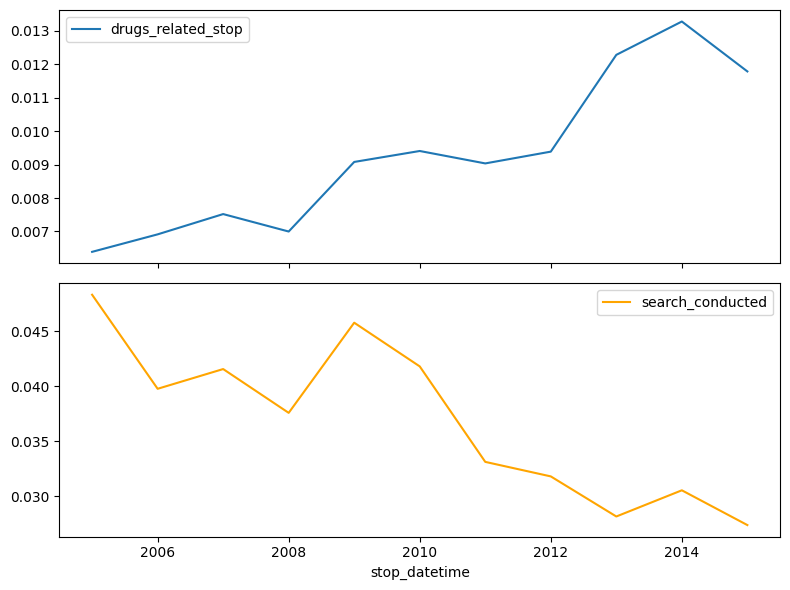

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/police.csv')

# Gabungkan tanggal & waktu jika perlu
if 'stop_date' in df.columns and 'stop_time' in df.columns:
    df['stop_datetime'] = pd.to_datetime(df['stop_date'] + ' ' + df['stop_time'], errors='coerce')
elif 'stop_datetime' in df.columns:
    df['stop_datetime'] = pd.to_datetime(df['stop_datetime'], errors='coerce')

# Ambil tahun dari stop_datetime
df['year'] = df['stop_datetime'].dt.year

# Hitung proporsi drugs_related_stop per tahun
drugs_rate = df.groupby('year')['drugs_related_stop'].mean()

# Hitung proporsi search_conducted per tahun
search_rate = df.groupby('year')['search_conducted'].mean()

# Plot dua grafik terpisah (subplot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Grafik atas - Drugs
drugs_rate.plot(ax=ax1, label='drugs_related_stop')
ax1.legend()
ax1.set_ylabel(None)

# Grafik bawah - Search
search_rate.plot(ax=ax2, color='orange', label='search_conducted')
ax2.legend()
ax2.set_xlabel('stop_datetime')
ax2.set_ylabel(None)

# Tampilkan grafik
plt.tight_layout()
plt.show()


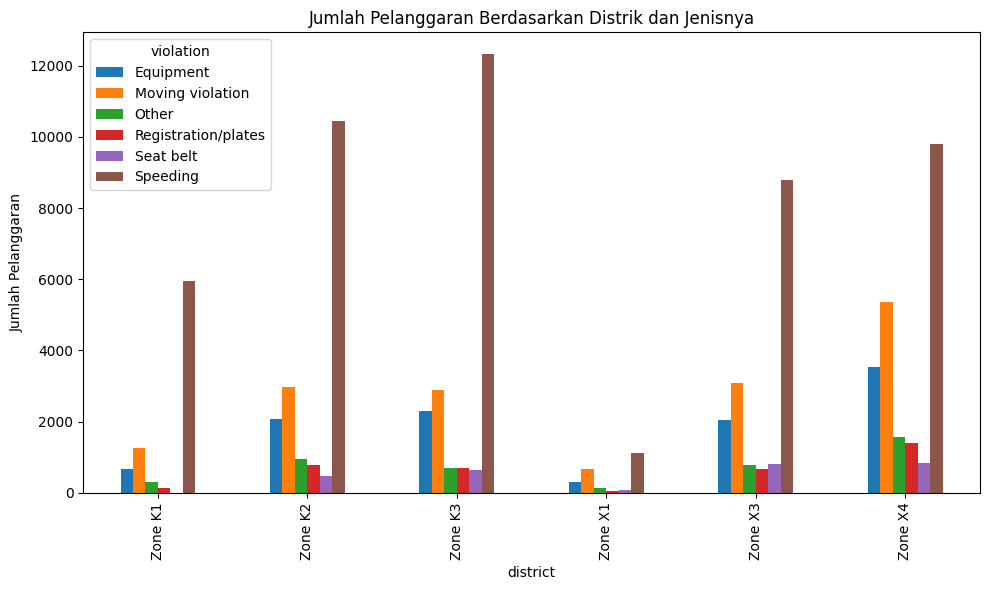

In [ ]:
#2g

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/police.csv')

# Hitung jumlah pelanggaran untuk setiap kombinasi district dan violation
violation_district = df.groupby(['district', 'violation']).size().unstack()

# Plot grafik batang
violation_district.plot(kind='bar', figsize=(10, 6))
plt.xlabel('district')
plt.ylabel('Jumlah Pelanggaran')
plt.title('Jumlah Pelanggaran Berdasarkan Distrik dan Jenisnya')
plt.legend(title='violation')
plt.tight_layout()
plt.show()


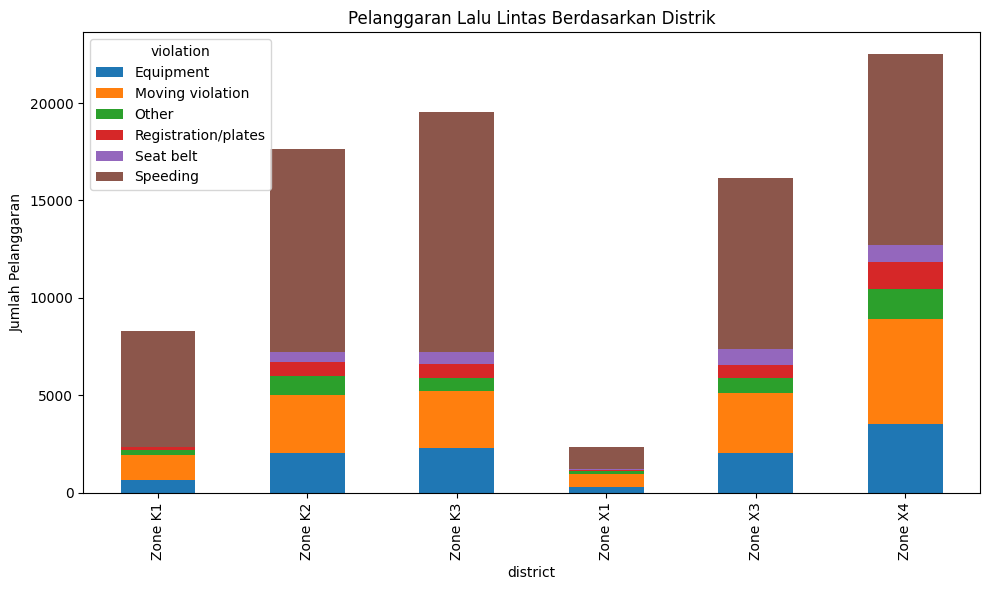

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/police.csv')

# Ganti nama distrik jika perlu (opsional, biar tampil Zone K1, K2, K3)
df['district'] = df['district'].replace({
    'Zone1': 'Zone K1',
    'Zone2': 'Zone K2',
    'Zone3': 'Zone K3'
})

# Hitung jumlah pelanggaran berdasarkan distrik dan jenis pelanggaran
violation_district = df.groupby(['district', 'violation']).size().unstack().fillna(0)

# Plot grafik batang bertumpuk
violation_district.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('district')
plt.ylabel('Jumlah Pelanggaran')
plt.title('Pelanggaran Lalu Lintas Berdasarkan Distrik')
plt.legend(title='violation')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data
df = pd.read_csv('/content/testcpns.csv')  # pastikan spasi dihapus jika ada

# 2. Bersihkan kolom IPK (jika misalnya IPK ditulis sebagai 03.09 atau 02.03)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# 3. Pisahkan fitur dan target
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# 4. Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Menampilkan koefisien
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nKoefisien model:\n", coeff)


Akurasi: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.67      1.00      0.80         2

    accuracy                           0.88         8
   macro avg       0.83      0.92      0.85         8
weighted avg       0.92      0.88      0.88         8


Koefisien model:
             Feature  Coefficient
0             toefl     0.020347
1               ipk     0.936537
2  pengalaman_kerja     0.987586


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan kolom IPK (format seperti 03.09)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Tampilkan ringkasan statistik deskriptif
summary = df.describe()
print(summary)


            toefl        ipk  pengalaman_kerja   diterima
count   40.000000  40.000000         40.000000  40.000000
mean   654.000000   2.694500          3.425000   0.475000
std     61.427464   0.653899          1.737778   0.505736
min    540.000000   1.070000          1.000000   0.000000
25%    607.500000   2.070000          2.000000   0.000000
50%    660.000000   3.030000          4.000000   0.000000
75%    690.000000   3.070000          5.000000   1.000000
max    780.000000   4.000000          6.000000   1.000000


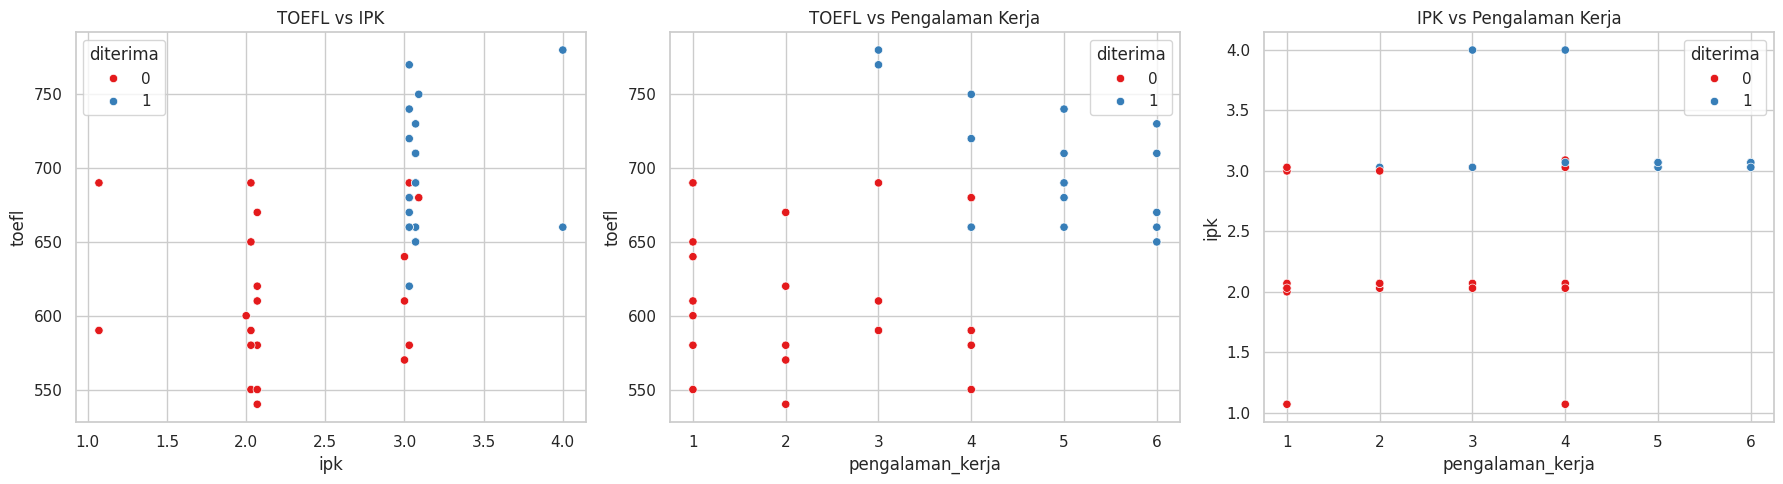

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan format IPK (jika perlu)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Atur style seaborn
sns.set(style='whitegrid')

# Buat 3 scatter plot: toefl vs ipk, toefl vs pengalaman, ipk vs pengalaman
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Scatter plot TOEFL vs IPK
sns.scatterplot(ax=axes[0], data=df, x='ipk', y='toefl', hue='diterima', palette='Set1')
axes[0].set_title('TOEFL vs IPK')

# 2. Scatter plot TOEFL vs Pengalaman Kerja
sns.scatterplot(ax=axes[1], data=df, x='pengalaman_kerja', y='toefl', hue='diterima', palette='Set1')
axes[1].set_title('TOEFL vs Pengalaman Kerja')

# 3. Scatter plot IPK vs Pengalaman Kerja
sns.scatterplot(ax=axes[2], data=df, x='pengalaman_kerja', y='ipk', hue='diterima', palette='Set1')
axes[2].set_title('IPK vs Pengalaman Kerja')

# Tampilkan grafik
plt.tight_layout()
plt.show()


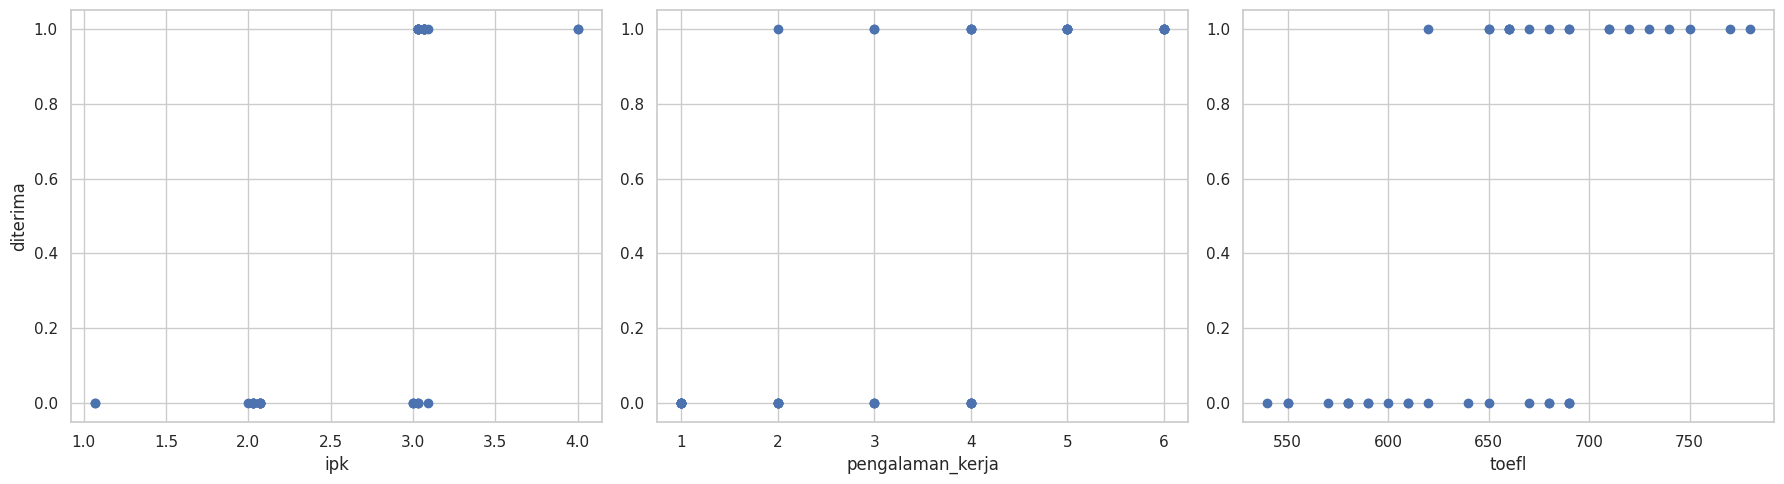

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan format IPK
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Buat figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: IPK vs diterima
axes[0].scatter(df['ipk'], df['diterima'])
axes[0].set_xlabel('ipk')
axes[0].set_ylabel('diterima')

# Scatter plot: Pengalaman kerja vs diterima
axes[1].scatter(df['pengalaman_kerja'], df['diterima'])
axes[1].set_xlabel('pengalaman_kerja')

# Scatter plot: TOEFL vs diterima
axes[2].scatter(df['toefl'], df['diterima'])
axes[2].set_xlabel('toefl')

# Tampilkan plot
plt.tight_layout()
plt.show()


Confusion Matrix:
[[7 1]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



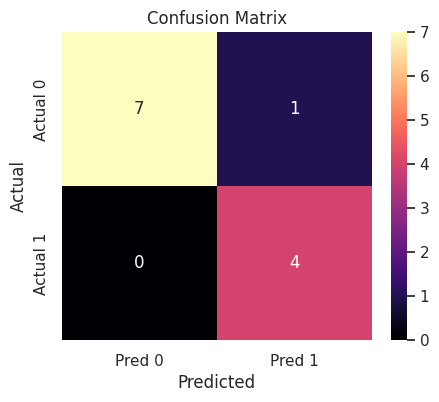

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan kolom IPK (hapus leading zero jika ada)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Split fitur dan label
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Split data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix pakai seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix:
[[7 1]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



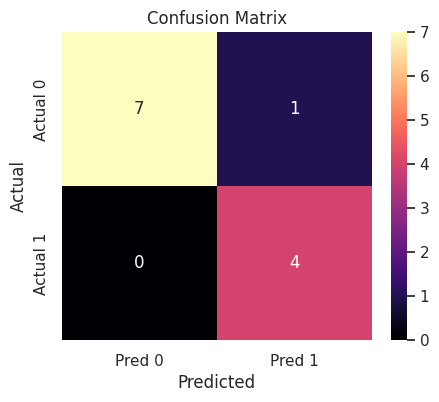

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan kolom IPK (hapus leading zero jika ada)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Split fitur dan label
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Split data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix pakai seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan kolom IPK (hapus leading zero jika ada)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Split fitur dan label
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Split data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix pakai seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


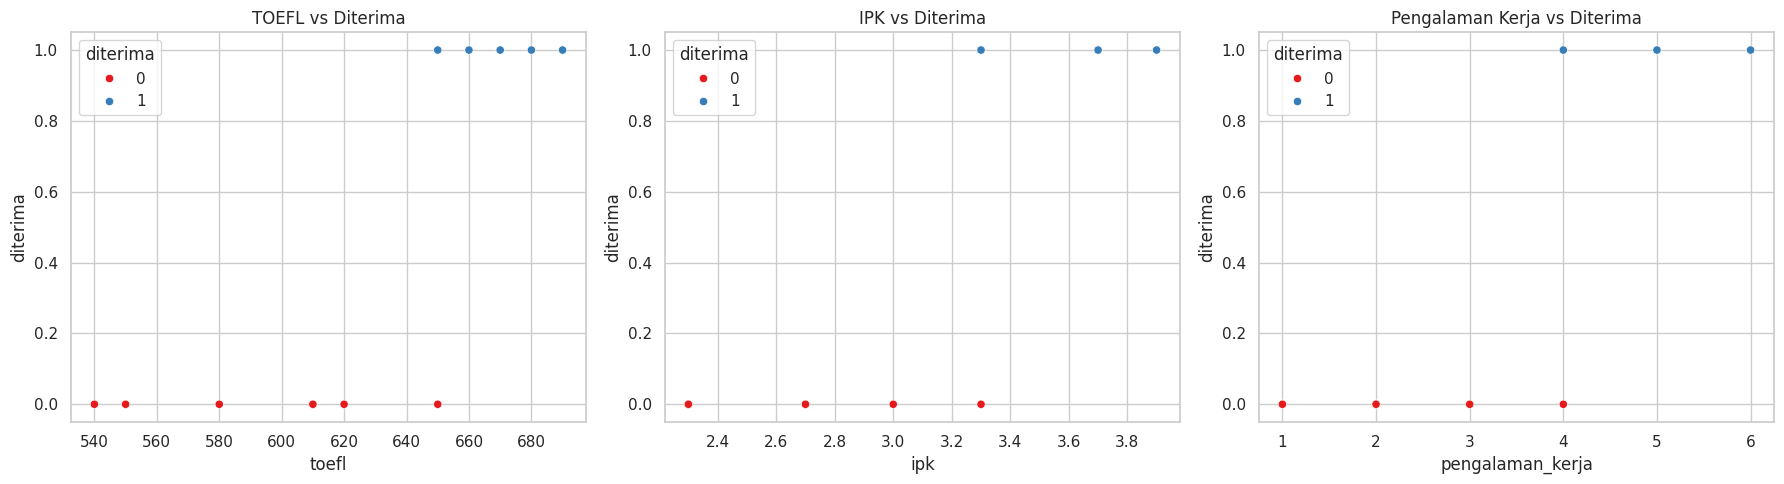

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data dari tabel
data = {
    'toefl': [550, 620, 670, 680, 610, 610, 650, 690, 540, 660, 580, 650],
    'ipk': [2.3, 3.3, 3.3, 3.9, 2.7, 3.0, 3.7, 3.7, 2.7, 3.3, 2.3, 2.3],
    'pengalaman_kerja': [4, 2, 6, 4, 3, 1, 6, 5, 2, 5, 2, 1],
    'diterima': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
}

# Buat DataFrame
df = pd.DataFrame(data)

# Buat figure dengan 3 plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot: TOEFL vs diterima
sns.scatterplot(ax=axes[0], x='toefl', y='diterima', data=df, hue='diterima', palette='Set1')
axes[0].set_title('TOEFL vs Diterima')
axes[0].set_xlabel('toefl')
axes[0].set_ylabel('diterima')

# Scatter plot: IPK vs diterima
sns.scatterplot(ax=axes[1], x='ipk', y='diterima', data=df, hue='diterima', palette='Set1')
axes[1].set_title('IPK vs Diterima')
axes[1].set_xlabel('ipk')
axes[1].set_ylabel('diterima')

# Scatter plot: Pengalaman Kerja vs diterima
sns.scatterplot(ax=axes[2], x='pengalaman_kerja', y='diterima', data=df, hue='diterima', palette='Set1')
axes[2].set_title('Pengalaman Kerja vs Diterima')
axes[2].set_xlabel('pengalaman_kerja')
axes[2].set_ylabel('diterima')

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [ ]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dataset pelatihan (dari file testcpns.csv)
df = pd.read_csv('/content/testcpns.csv')
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Split fitur dan label
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Latih model
model = LogisticRegression()
model.fit(X, y)

# ===== PREDIKSI PELAMAR BARU =====

# Data pelamar baru dari gambar
data_baru = pd.DataFrame({
    'toefl': [590, 740, 680, 610, 710],
    'ipk': [2.0, 3.07, 3.03, 2.03, 3.0],
    'pengalaman_kerja': [3, 4, 6, 1, 5]
})

# Prediksi
prediksi = model.predict(data_baru)

# Tampilkan hasil
data_baru['diterima (prediksi)'] = prediksi
print(data_baru)


   toefl   ipk  pengalaman_kerja  diterima (prediksi)
0    590  2.00                 3                    0
1    740  3.07                 4                    1
2    680  3.03                 6                    1
3    610  2.03                 1                    0
4    710  3.00                 5                    1


Confusion Matrix:
[[7 1]
 [0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



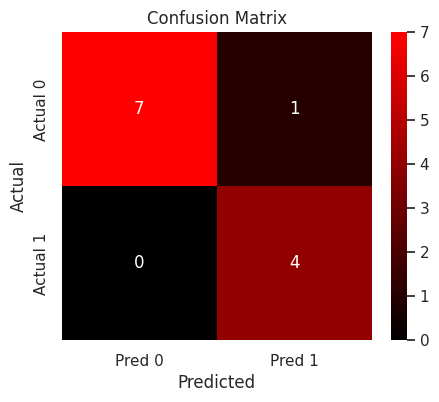

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load data
df = pd.read_csv('/content/testcpns.csv')

# Bersihkan kolom IPK (hapus leading zero jika ada)
df['ipk'] = df['ipk'].astype(str).str.replace('^0+', '', regex=True).astype(float)

# Split fitur dan label
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Split data training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediksi data test
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Custom red-black colormap
red_black = LinearSegmentedColormap.from_list('red_black', ['black', 'red'])

# Visualisasi Confusion Matrix dengan warna red-black
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap=red_black,
            xticklabels=['Pred 0', 'Pred 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


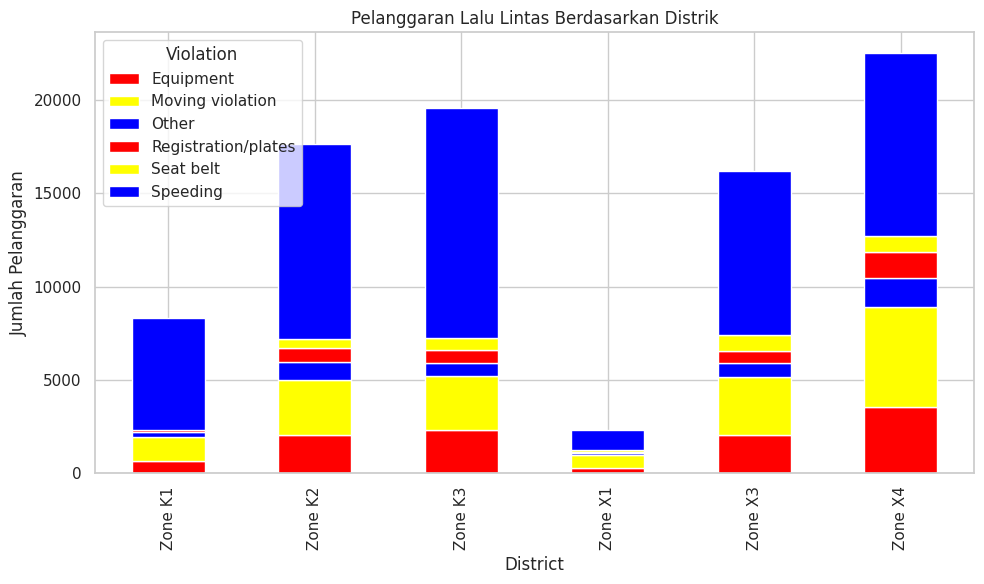

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/police.csv')

# Ganti nama distrik (opsional)
df['district'] = df['district'].replace({
    'Zone1': 'Zone K1',
    'Zone2': 'Zone K2',
    'Zone3': 'Zone K3'
})

# Hitung jumlah pelanggaran berdasarkan distrik dan jenis pelanggaran
violation_district = df.groupby(['district', 'violation']).size().unstack().fillna(0)

# Plot grafik batang bertumpuk dengan warna khusus
violation_district.plot(kind='bar', stacked=True, figsize=(10, 6),
                        color=['red', 'yellow', 'blue'])

plt.xlabel('District')
plt.ylabel('Jumlah Pelanggaran')
plt.title('Pelanggaran Lalu Lintas Berdasarkan Distrik')
plt.legend(title='Violation')
plt.tight_layout()
plt.show()


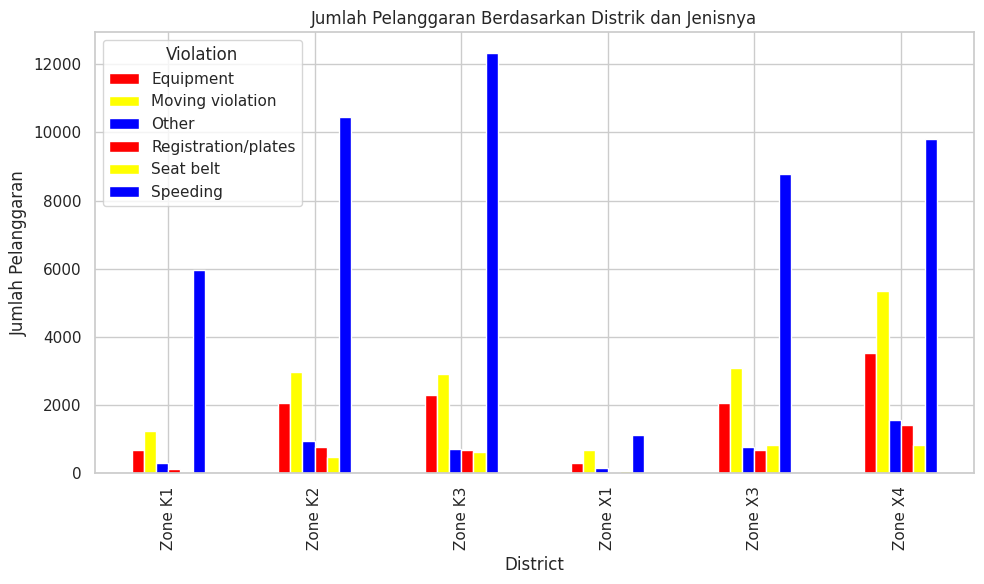

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/police.csv')

# Hitung jumlah pelanggaran untuk setiap kombinasi district dan violation
violation_district = df.groupby(['district', 'violation']).size().unstack()

# Plot grafik batang (warna: red, yellow, blue)
violation_district.plot(kind='bar', figsize=(10, 6), color=['red', 'yellow', 'blue'])

plt.xlabel('District')
plt.ylabel('Jumlah Pelanggaran')
plt.title('Jumlah Pelanggaran Berdasarkan Distrik dan Jenisnya')
plt.legend(title='Violation')
plt.tight_layout()
plt.show()
